___
# Ciência dos Dados - PROJETO 1

## COLOQUE AQUI SEU NOME
___

## TÍTULO DO SEU PROJETO

___
## Introdução

Descreva aqui o que pretende analisar!
Analisar a diferença salarial entre : homens e mulheres,raça/cor,grau de escolaridade

___
## Filtros da base de dados

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import zeros_like

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Leonardo\OneDrive\insper\dps 2018\ciencia dos dados\projeto 1


In [4]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
dd2011=pd.read_csv('PES2011.csv',sep=',')


In [5]:
#Pegar as colunas
dadosID2011= dd2011.loc[: ,["UF","V0302","V6007","V0601","V4743","V0404","V8005","V4742"]]

In [6]:

dadosID2011.V0302=dadosID2011.V0302.astype("category")
dadosID2011.V0302.cat.categories=(['Masculino','Feminino'])
dadosID2011.V6007=dadosID2011.V6007.astype("category")
dadosID2011.V6007.cat.categories=(['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior de graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.'])
dadosID2011.V0601=dadosID2011.V0601.astype("category")
dadosID2011.V0601.cat.categories=(['Sim','Não'])
dadosID2011.V4743=dadosID2011.V4743.astype("category")
dadosID2011.V4743.cat.categories=(['Sem rendimento','Até ¼ salário mínimo','Mais de ¼ até ½ salário mínimo','Mais de ½ até 1 salário mínimo','Mais de 1 até 2 salários mínimos','Mais de 2 até 3 salários mínimos','Mais de 3 até 5 salários mínimos','Mais de 5 salários mínimos','Sem declaração'])
dadosID2011.V0404=dadosID2011.V0404.astype("category")
dadosID2011.V0404.cat.categories=(['Indígena','Branca','Preta','Amarela','Parda'])
dadosID2011.V4742=dadosID2011.V4742.astype('float')

In [7]:
#tirar os NaN
#Dados2011Completos=dadosID2011.dropna()

In [8]:
#filtragem por cor/raça
indio=dadosID2011.loc[(dadosID2011['V0404'] == 'Indígena')]
branca=dadosID2011.loc[(dadosID2011['V0404'] == 'Branca')]
negra=dadosID2011.loc[(dadosID2011['V0404'] == 'Preta')]
negra=dadosID2011.loc[(dadosID2011['V0404'] == 'Parda')]
amarela=dadosID2011.loc[(dadosID2011['V0404'] == 'Amarela')]

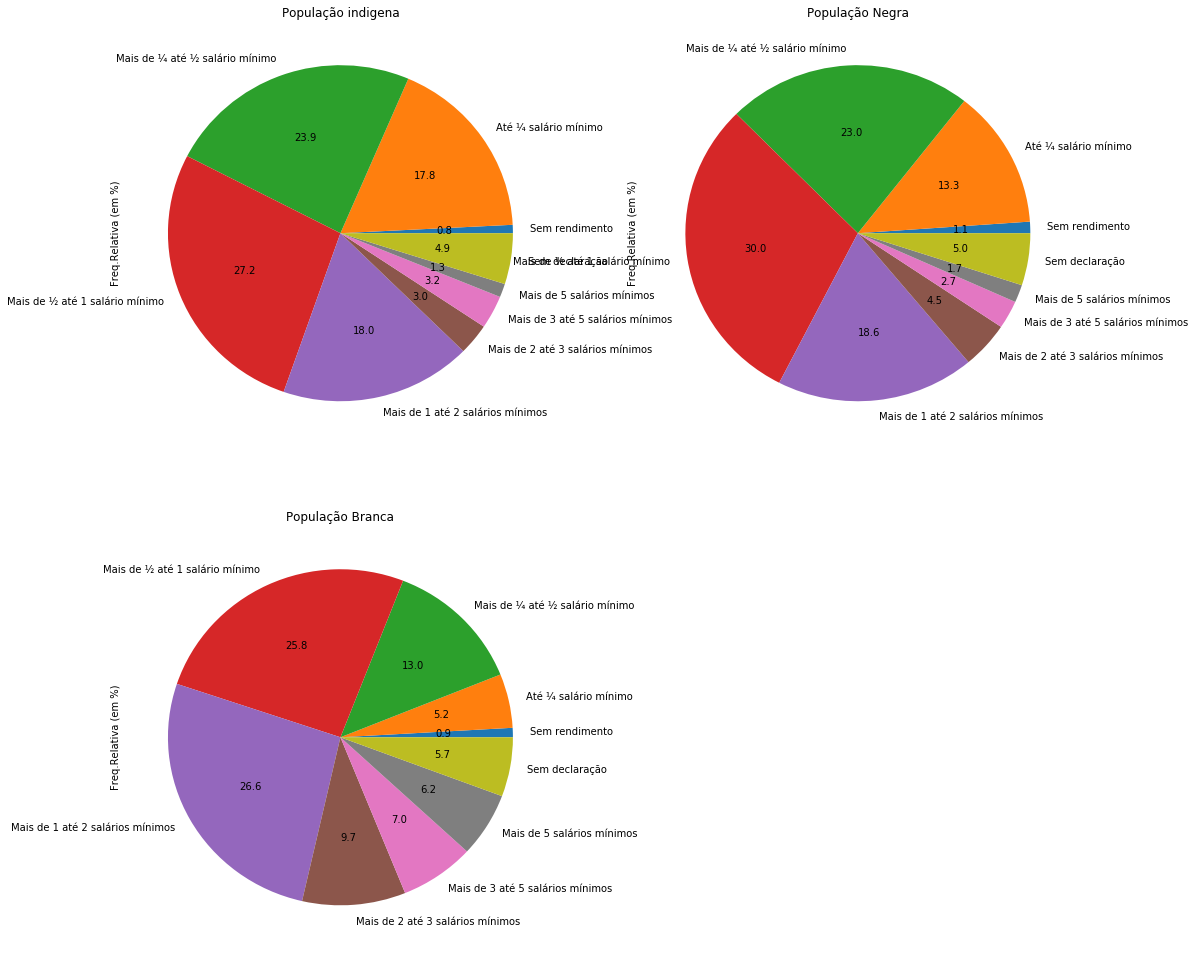

In [9]:
fig = plt.figure(figsize=(17, 17))

###########################################################################################################################
entrada = (indio.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(221)
plot = entrada.plot(kind='pie',title='População indigena',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')

entrada2 = (negra.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(222)
plot = entrada2.plot(kind='pie',title='População Negra',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')



entrada3 = (branca.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(223)
plot = entrada3.plot(kind='pie',title='População Branca',autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('')

In [10]:
#filtragem por sexo
homens=dadosID2011.loc[(dadosID2011['V0302'] == 'Masculino')]
mulheres=dadosID2011.loc[(dadosID2011['V0302'] == 'Feminino')]

In [11]:
def converter(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

In [12]:
cores1 = (dadosID2011.V0404.value_counts(sort=True, normalize=True)*100).round(decimals=1)
print(cores1,'\n')


Parda       46.2
Branca      44.3
Preta        8.5
Indígena     0.5
Amarela      0.5
Name: V0404, dtype: float64 



In [13]:

salariocor = pd.crosstab([dadosID2011.V0404],dadosID2011.V4743)#*(100/358919)
salariocor

V4743,Sem rendimento,Até ¼ salário mínimo,Mais de ¼ até ½ salário mínimo,Mais de ½ até 1 salário mínimo,Mais de 1 até 2 salários mínimos,Mais de 2 até 3 salários mínimos,Mais de 3 até 5 salários mínimos,Mais de 5 salários mínimos,Sem declaração
V0404,,,,,,,,,
Indígena,14,322,433,495,326,54,58,24,88
Branca,1491,8181,20644,40976,42217,15374,11068,9766,9069
Preta,368,2961,6511,9553,6488,1560,792,429,1723
Amarela,20,129,219,421,395,196,158,139,115
Parda,1863,22014,38018,49621,30760,7504,4428,2750,8319


In [14]:
#salario por escolaridade
edusal=pd.crosstab([dadosID2011.V4743],dadosID2011.V6007)
edusal

V6007,Elementar (primário),"Médio 1º ciclo (ginasial, etc.)","Médio 2º ciclo (científico, clássico, etc.)",Regular do ensino fundamental ou do 1º grau,Regular do ensino médio ou do 2º grau,Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau,Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau,Superior de graduação,Mestrado ou doutorado,Alfabetização de jovens e adultos,Creche,Classe de alfabetização - CA,"Maternal, jardim de infância etc."
V4743,,,,,,,,,,,,,
Sem rendimento,303,78,32,828,687,28,34,146,2,20,11,9,9
Até ¼ salário mínimo,1593,172,30,7986,2849,267,122,114,2,153,51,127,48
Mais de ¼ até ½ salário mínimo,4565,699,204,15547,9481,482,375,567,8,207,126,222,80
Mais de ½ até 1 salário mínimo,11602,2083,704,20307,20835,788,939,2369,26,299,172,264,100
Mais de 1 até 2 salários mínimos,10236,2487,1345,12666,21099,572,1221,6065,127,141,80,106,30
Mais de 2 até 3 salários mínimos,2384,872,757,2284,6360,136,433,4518,164,18,15,12,13
Mais de 3 até 5 salários mínimos,1108,466,662,878,3282,71,237,5040,294,10,10,7,3
Mais de 5 salários mínimos,386,227,504,333,1488,13,120,6162,774,2,3,1,2
Sem declaração,1612,501,418,2773,4063,123,189,2557,203,34,15,26,14


In [15]:
#salario por escolaridade e cor/raça
edusal2=pd.crosstab([dadosID2011.V6007,dadosID2011.V0404],dadosID2011.V4743)
edusal2

V4743                                                        Sem rendimento  \
V6007                                              V0404                      
Elementar (primário)                               Indígena               4   
                                                   Branca               131   
                                                   Preta                 35   
                                                   Amarela                3   
                                                   Parda                130   
Médio 1º ciclo (ginasial, etc.)                    Indígena               0   
                                                   Branca                36   
                                                   Preta                  9   
                                                   Amarela                0   
                                                   Parda                 33   
Médio 2º ciclo (científico, clássico, etc.)        Indígena               2   
                                                   Branca                15   
                                                   Preta                  2   
                                                   Amarela                0   
                                                   Parda                 13   
Regular do ensino fundamental ou do 1º grau        Indígena               1   
                                                   Branca               288   
                                                   Preta                 89   
                                                   Amarela                5   
                                                   Parda                445   
Regular do ensino médio ou do 2º grau              Indígena               3   
                                                   Branca               268   
                                                   Preta                 81   
                                                   Amarela                2   
                                                   Parda                333   
Educação de jovens e adultos ou supletivo do en... Indígena               0   
                                                   Branca                15   
                                                   Preta                  2   
                                                   Amarela                0   
                                                   Parda                 11   
...                                                                     ...   
Superior de graduação                              Indígena               0   
                                                   Branca                94   
                                                   Preta                  6   
                                                   Amarela                4   
                                                   Parda                 42   
Mestrado ou doutorado                              Indígena               0   
                                                   Branca                 2   
                                                   Preta                  0   
                                                   Amarela                0   
                                                   Parda                  0   
Alfabetização de jovens e adultos                  Indígena               0   
                                                   Branca                 4   
                                                   Preta                  1   
                                                   Amarela                0   
                                                   Parda                 15   
Creche                                             Indígena               0   
                                                   Branca                 6   
                                                  

In [51]:
#o valor do step foi definido com base no salario minimo de 2011
faixa = range(100,15000,271)
#tirar os nan da renda1
renda=dadosID2011.V4742[(dadosID2011.V4742 >= 0) &(dadosID2011.V4742 != 999999999999)]
renda=renda.dropna()
renda.describe()

count    3.580540e+05
mean     5.394158e+10
std      2.259027e+11
min      0.000000e+00
25%      2.500000e+02
50%      4.810000e+02
75%      9.150000e+02
max      1.000000e+12
Name: V4742, dtype: float64

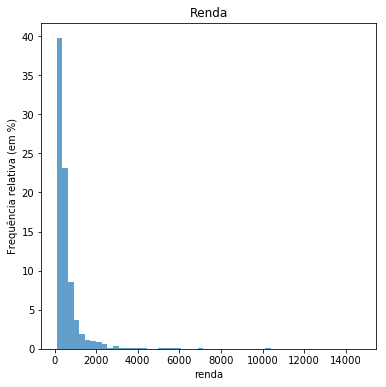

In [52]:
renda_indios=renda.loc[(dadosID2011['V0404'] == 'Indígena')]
plot = renda_indios.plot.hist(bins=faixa,title='Renda', weights=zeros_like(renda_indios)+1./renda_indios.size*100, figsize=(6, 6), alpha=0.7)
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()

In [ ]:
plot=renda1.plot.hist(bins=faixa,title='Renda1', normed=1, alpha=0.5)
plt.ylabel("salario per capita")
plt.xlabel('salario')
plt.show()

___
## Análise e Resultados

___
## Conclusão 

Descreva aqui suas conclusões!